In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels
from statsmodels.tsa.api import ExponentialSmoothing
%matplotlib notebook

In [2]:
df = pd.read_csv('Data for Forecast.csv', decimal=",")
df.head()

,year,month,sales
0,2009,1,44265939.13
1,2009,3,54900710.11
2,2009,2,55917784.58
3,2009,4,59119663.88
4,2009,5,60949016.31


In [3]:
df["Date"] = df.year.astype(str).str.cat(df.month.astype(str), sep='-')

In [4]:
df.dtypes

year       int64
month      int64
sales    float64
Date      object
dtype: object

In [5]:
df = df.drop(['year', 'month'], axis=1)
df.head()

,sales,Date
0,44265939.13,2009-1
1,54900710.11,2009-3
2,55917784.58,2009-2
3,59119663.88,2009-4
4,60949016.31,2009-5


In [6]:
df['Date'] = pd.to_datetime(df['Date'], format='%YYYY-%mm', errors='ignore')

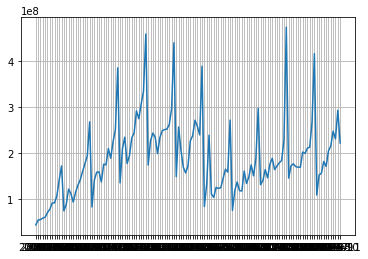

In [7]:
fig=plt.figure()

plt.plot(df['Date'], df['sales'])
plt.grid(True)

In [8]:
df_train, df_test = df[0:91], df[91:130]

<function matplotlib.pyplot.show(*args, **kw)>

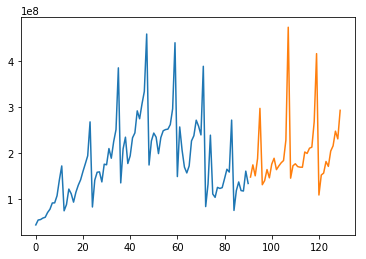

In [9]:
df_train.sales.plot()
df_test.sales.plot()

plt.show

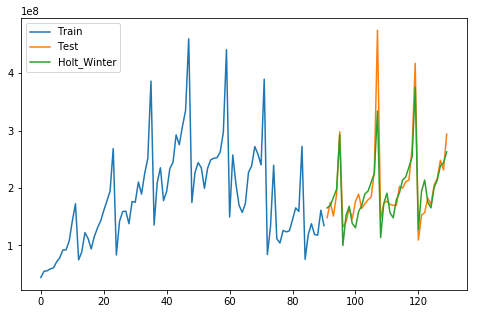

In [10]:
y_hat_avg = df_test.copy()

fit1=ExponentialSmoothing(np.asarray(df_train['sales']) ,seasonal_periods=12 ,trend='additive', seasonal='mul').fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(df_test))

plt.figure(figsize=(8,5))
plt.plot( df_train['sales'], label='Train')
plt.plot(df_test['sales'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.show()

In [11]:
y_hat_avg.head()

,sales,Date,Holt_Winter
91,148370579.7,2016-8,1.652496e+08
92,174909921.6,2016-9,1.698180e+08
93,151092180.1,2016-10,1.835134e+08
94,188806640.3,2016-11,1.976359e+08
95,297855682.3,2016-12,2.929518e+08
